In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [129]:
# Data Collection and Processing

#1. Load CSV
car_data = pd.read_csv('03_car data.csv')
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [130]:
# Inspect the first 5 rows of the dataframe
car_data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [131]:
# Checking the number of rows and columns
car_data.shape

# => At the end, will trian ml model with 'Selling_Price' and other features('Columns')
# => How much price the car can be sold? etc.

(301, 9)

In [132]:
# Receiving the info regarding the dataset
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [133]:
# check the missing values in number
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [134]:
# Checking the distribution of categorical data
print(car_data.Fuel_Type.value_counts(),'\n')
print(car_data.Seller_Type.value_counts(),'\n')
print(car_data.Transmission.value_counts(),'\n')



Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64 

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64 

Manual       261
Automatic     40
Name: Transmission, dtype: int64 



In [135]:
# Encoding (ml cannot understand text properly)
# => Therefore converting to numerical values

# 1. Fuel_Type
car_data.replace({"Fuel_Type":{'Petrol':0, 'Diesel':1, 'CNG': 2 }},inplace = True)

# 2. Seller_Type
car_data.replace({"Seller_Type":{'Dealer': 0, 'Individual' : 1}},inplace = True)

# 3. Transmission
car_data.replace({'Transmission': {'Automatic': 0, 'Manual': 1}}, inplace = True)

car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,0,0,1,0
3,wagon r,2011,2.85,4.15,5200,0,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,1,0
297,brio,2015,4.00,5.90,60000,0,0,1,0
298,city,2009,3.35,11.00,87934,0,0,1,0
299,city,2017,11.50,12.50,9000,1,0,1,0


In [136]:
# Spliting Train, Test data (X,y)
X = car_data.drop(['Car_Name', 'Selling_Price'], axis = 1)
y = car_data['Selling_Price'] # IDN Currency 

print(X,'\n')
print(y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             1   
1    2013           9.54       43000          1            0             1   
2    2017           9.85        6900          0            0             1   
3    2011           4.15        5200          0            0             1   
4    2014           6.87       42450          1            0             1   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             1   
297  2015           5.90       60000          0            0             1   
298  2009          11.00       87934          0            0             1   
299  2017          12.50        9000          1            0             1   
300  2016           5.90        5464          0            0             1   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [137]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.1, random_state = 2)
# 90% of data will be training data // 10% will be testing data
# 0.1 size is common, imagine the large dataset ==> Larger dataset will yield better result
# Random_State = 2 (Since splited by two?)

In [138]:
# Train the model (Linear Regression)
lin_reg = LinearRegression()

In [139]:
lin_reg.fit(X_train, y_train)


LinearRegression()

In [140]:
# Trained, and evaluate
# y = mx + c
training_data_prediction = lin_reg.predict(X_train)

In [141]:
# Using R Square Error
error_score = metrics.r2_score(y_train, training_data_prediction) 
# Compare original value (y_train)
    # Values predicted by my model (training_data_prediction)
print("R Squared Error: (train)" , error_score) # In regression, use R Squared Error


# Acc_score == classification of problem

R Squared Error: (train) 0.8799451660493717


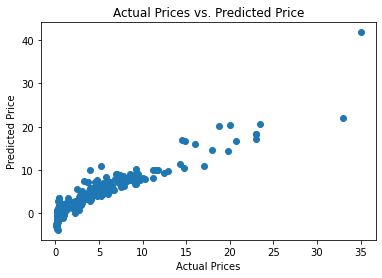

In [142]:
# Visualization (Actual Price / Predicted Price)
plt.scatter(y_train, training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs. Predicted Price')
plt.show()

In [143]:
# If you see the scatter chart, once the price value increase, notice the gap
# ==> Machine Learning model is very close to original sold prices.

In [144]:
# Evaluation of model w/ test data
test_data_prediction = lin_reg.predict(X_test)

In [145]:
error_score_test = metrics.r2_score(y_test, test_data_prediction) 
print("R Squared Error: (train)" , error_score, '\n')
print("R Squared Error (test): " , error_score_test) # In regression, use R Squared Error

# notice the R Squared Error (test) is less (Good)

R Squared Error: (train) 0.8799451660493717 

R Squared Error (test):  0.8365766715025852


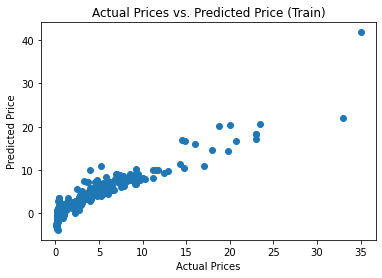

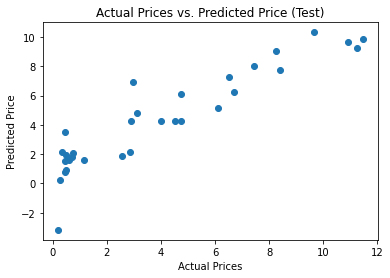

In [146]:
# Visualization (train) (Actual Price / Predicted Price)
plt.scatter(y_train, training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs. Predicted Price (Train)')
plt.show()

# Visualization (test) (Actual Price / Predicted Price)
plt.scatter(y_test, test_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs. Predicted Price (Test)')
plt.show()

In [147]:
# Notice that there are no huge differences

#(Linear Regression performs better which are directly correlated or positively correlated )

### LASSO Regression

In [148]:
# Train the model (Linear Regression)
lasso_reg = Lasso()

In [149]:
lasso_reg.fit(X_train, y_train)

Lasso()

In [152]:
# Evaluation of model w/ training data
lasso_training_data_prediction = lasso_reg.predict(X_train)

# Evaluation of model w/ test data
lasso_test_data_prediction = lasso_reg.predict(X_test)

In [154]:
# Using R Square Error
lasso_error_score_train = metrics.r2_score(y_train, lasso_training_data_prediction) 
# Compare original value (y_train)
    # Values predicted by my model (training_data_prediction)

lasso_error_score_test = metrics.r2_score(y_test, lasso_test_data_prediction) 

print("R Squared Error: (train)" , lasso_error_score_train, '\n')
print("R Squared Error (test): " , lasso_error_score_test) # In regression, use R Squared Error

R Squared Error: (train) 0.8427856123435794 

R Squared Error (test):  0.8709167941173195


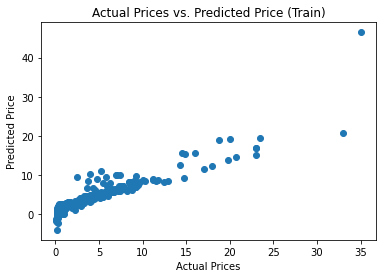

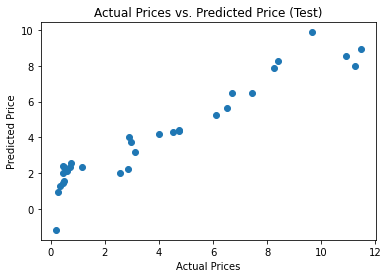

In [155]:
# Visualization (train) (Actual Price / Predicted Price)
plt.scatter(y_train, lasso_training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs. Predicted Price (Train)')
plt.show()

# Visualization (test) (Actual Price / Predicted Price)
plt.scatter(y_test, lasso_test_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs. Predicted Price (Test)')
plt.show()